# Exploratory Analysis of Real Estate News Data

## Setup

In [82]:
import pandas as pd
import numpy as np
import os, sys
import json
from dotenv import find_dotenv, load_dotenv
from datetime import datetime

sys.path.append('../')
from src.data.azure_storage_utils import load_text_file

In [83]:
with open("../src/config.json", "r") as f:
    cfg = json.load(f)
    
load_dotenv(find_dotenv())
AZURE_STORAGE_NAME = os.environ.get("AZURE_STORAGE_NAME")
AZURE_STORAGE_KEY = os.environ.get("AZURE_STORAGE_KEY")

In [84]:
# load stored data from blob store
dRaw = load_text_file(
    containerName = cfg["azureStorage"]["containerName"], 
    blobName = cfg["azureStorage"]["blobName"],
    accountName = AZURE_STORAGE_NAME,
    accountKey = AZURE_STORAGE_KEY
    )

## General Overview

See how the feedly data is stuctured

In [85]:
list(dRaw.items())[0]

('tWH7WySPByo3uihEWohLz5ZTo2J828AaTnFpHiUsvDo=_14ffc58c7af:156decbc:fccac72e',
 {'unread': False,
  'published': 1443047720879,
  'summary': {'direction': 'ltr',
   'content': '<img height="55" alt="Copyright Fotolia.de / nmann77" align="left" width="55" src="http://www.immonewsfeed.de/upload/immonews/small/1442390871_Fotolia_62893253_X-nmann77.jpg"><p>Wie der Verband Haus &amp; Grund mitteilt, wird die Nachfrage nach Wohnraum in den kommenden Jahren höher als angenommen sein. Die hohen Zuwanderungs- und Flüchtlingszahlen würden ein schnelles Handeln erfordern, um den Menschen Wohnungen anbieten zu können. Der Verband fordert deshalb die Politik auf, die Kosten für den Wohnungsbau zu senken.\nVon den allein in diesem Jahr erwarteten 800.000 Flüchtlingen würden laut Haus &amp; Grund viele dauerhaft in Deutschland wohnen bleiben. Damit der erforderliche Wohnraum gebaut werden kann, sei ein ganzes Bündel an Maßnahmen notwendig:\nErhöhung der steuerlichen Abschreibung von zwei auf vier Pro

In [86]:
# gather structured information
dDocs = pd.DataFrame.from_dict(dRaw).transpose()
dDocs = dDocs[["feedTitle", "author", "published", "engagement", "title"]]

# convert timestamps
dDocs["published"] = pd.to_datetime(dDocs["published"], unit="ms")
dDocs["published_period"] = pd.DatetimeIndex(dDocs["published"]).to_period("M").astype(str)

dDocs.head(10)

,feedTitle,author,published,engagement,title,published_period
tWH7WySPByo3uihEWohLz5ZTo2J828AaTnFpHiUsvDo=_14ffc58c7af:156decbc:fccac72e,Immonews RSS Feed,Fotolia.de / nmann77,2015-09-23 22:35:20.879,7,24.09.2015 - Politik & Wirtschaft: Haus & Grun...,2015-09
tWH7WySPByo3uihEWohLz5ZTo2J828AaTnFpHiUsvDo=_15994eb4e80:6bb50cc:1e99f69f,Immonews RSS Feed,Fotolia.de / 2xwilfinger,2017-01-12 23:02:46.144,17,13.01.2017 - Leben & Wohnen: Ausnahme beim Win...,2017-01
hu94UCg3vuxifOgio/b16czFOOJs9C7thvt+mklFm78=_15f5873f95f:9d862cf:4d363ef0,RETN - Real Estate Tech News,Lindsey Imperatore,2017-10-26 11:30:00.000,1,Exclusive Q&A With #RETAS Sponsor Glenn Murray...,2017-10
pAll0y5reb9EOfInG4eisUIzkoZc4xCx0HyK02/6FhU=_1436d43bf75:11670829:d7247628,Property Management Insider,Greg Willett,2014-01-07 15:50:04.000,14,Will Oakland’s Apartment Market Lead the Way i...,2014-01
xWDIGZBMt8xnhnzyNkukvtkIAR2mBD5dsDLzMT+azN4=_16204a07f50:21ee66:4e6e6075,PropTech News,proptechnews,2018-03-08 08:00:50.000,0,"Mehr, mehr, mehr PropTech",2018-03
tWH7WySPByo3uihEWohLz5ZTo2J828AaTnFpHiUsvDo=_157e42ac200:4a4a5af:297c8405,Immonews RSS Feed,PhotoDune.net / Slphotography2014,2016-10-20 22:16:29.952,9,21.10.2016 - Leben & Wohnen: Müllgebühren auf ...,2016-10
tWH7WySPByo3uihEWohLz5ZTo2J828AaTnFpHiUsvDo=_156da9e975d:67aac7:3e511f58,Immonews RSS Feed,PhotoDune.net / podsolnukh,2016-08-30 08:44:01.757,NaN,30.08.2016 - Immobilienkauf: Wohneigentum: Wor...,2016-08
hu94UCg3vuxifOgio/b16czFOOJs9C7thvt+mklFm78=_15b1b7baaad:3d822:afcb5334,RETN - Real Estate Tech News,Lindsey Imperatore,2017-03-29 16:30:00.000,2,4 Tech Trends Shaping the Future of Multifamily,2017-03
4v/RpGaaSAXvT2Bs8aaTO3EMdqI0rAzoIZdOrfYdn6o=_151675bea29:8b76c1:e8263233,ImmobilienScout24 Blog,Jessica D'Ovidio,2015-12-02 10:00:41.000,NaN,Hauptstadtengagement: Bahnhofsmission am Ostba...,2015-12
iUJBEZ0t16JNn5gboRic0ZqvaO+Dp0W5X1EhHXrImLg=_14fac363e70:1bfc6db2:1cbd0d70,Everything PropTech,admin,2015-09-08 06:06:54.000,NaN,5 in 5; your round up of the latest in PropTec...,2015-09


## Time of Publication

In [6]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

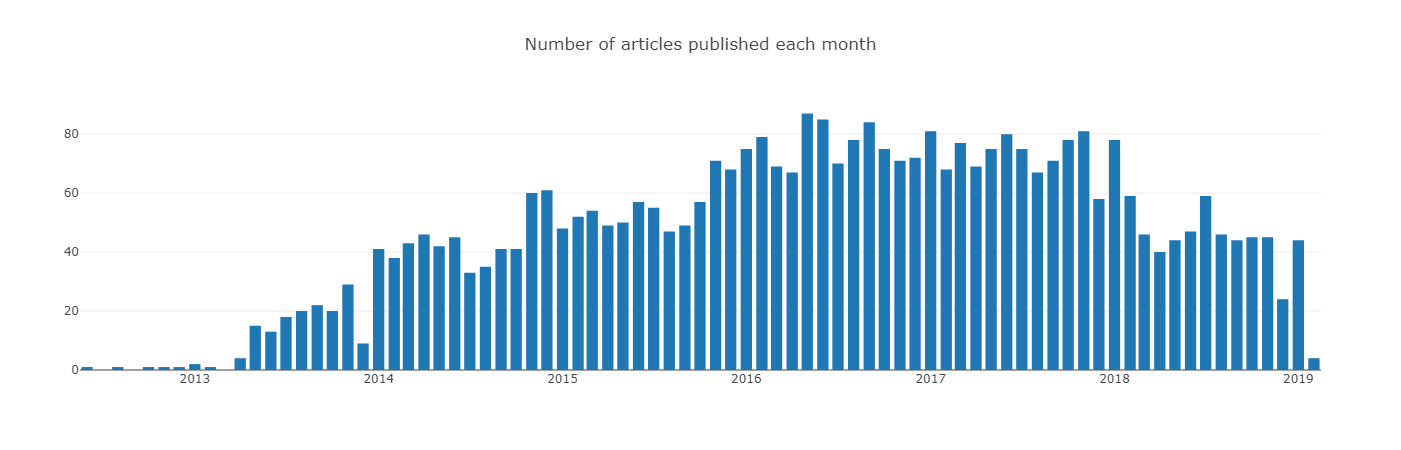

In [87]:
plotData = dDocs.groupby("published_period")
plotData = plotData.count().reset_index()

p = [go.Bar(x=plotData["published_period"], y=plotData["published"])]
l = go.Layout(title = "Number of articles published each month")
plotly.offline.iplot({"data": p, "layout":l})

Most articles were published between 2016 and 2018


## Sources

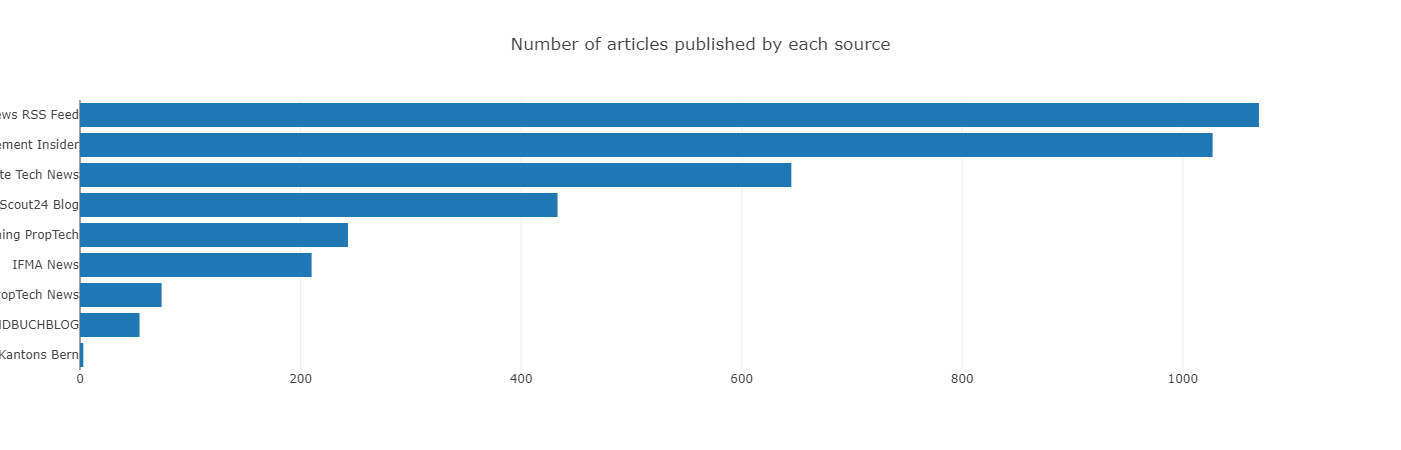

In [88]:
plotData = dDocs.groupby("feedTitle")
plotData = plotData.count().reset_index().sort_values(["published_period"])


p = [go.Bar(x=plotData["published"], y=plotData["feedTitle"], orientation="h")]
l = go.Layout(title = "Number of articles published by each source")
plotly.offline.iplot({"data": p, "layout":l})

## Document Characteristics

In [90]:
from bs4 import BeautifulSoup
import nltk

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

summaries = dict()
titles = dict()

# extract titles and summaries (v.get / try to handle missing summaries)
# remove html elements from summary
for k, v in dRaw.items():
    titles[k] = v.get("title")
    try:
        tmpSummary = v.get("summary").get("content")
        summaries[k] = strip_html(tmpSummary)
    except AttributeError:
        summaries[k] = None


In [91]:
# word tokenize summaries and titles
for k, v in summaries.items():
    try:
        summaries[k] = nltk.tokenize.word_tokenize(v)
    except TypeError:
        summaries[k] = None

In [92]:
# check equal length of dDocs and summaries
print(len(summaries))
print(len(dDocs))

ArticleLengths = list()
for i in dDocs.index:
    try:
        ArticleLengths.append(len(summaries[i]))
    except TypeError:
        ArticleLengths.append(0)

dDocs["ArticleLength"] = ArticleLengths
dDocs.head()

3758
3758


,feedTitle,author,published,engagement,title,published_period,ArticleLength
tWH7WySPByo3uihEWohLz5ZTo2J828AaTnFpHiUsvDo=_14ffc58c7af:156decbc:fccac72e,Immonews RSS Feed,Fotolia.de / nmann77,2015-09-23 22:35:20.879,7,24.09.2015 - Politik & Wirtschaft: Haus & Grun...,2015-09,166
tWH7WySPByo3uihEWohLz5ZTo2J828AaTnFpHiUsvDo=_15994eb4e80:6bb50cc:1e99f69f,Immonews RSS Feed,Fotolia.de / 2xwilfinger,2017-01-12 23:02:46.144,17,13.01.2017 - Leben & Wohnen: Ausnahme beim Win...,2017-01,134
hu94UCg3vuxifOgio/b16czFOOJs9C7thvt+mklFm78=_15f5873f95f:9d862cf:4d363ef0,RETN - Real Estate Tech News,Lindsey Imperatore,2017-10-26 11:30:00.000,1,Exclusive Q&A With #RETAS Sponsor Glenn Murray...,2017-10,55
pAll0y5reb9EOfInG4eisUIzkoZc4xCx0HyK02/6FhU=_1436d43bf75:11670829:d7247628,Property Management Insider,Greg Willett,2014-01-07 15:50:04.000,14,Will Oakland’s Apartment Market Lead the Way i...,2014-01,26
xWDIGZBMt8xnhnzyNkukvtkIAR2mBD5dsDLzMT+azN4=_16204a07f50:21ee66:4e6e6075,PropTech News,proptechnews,2018-03-08 08:00:50.000,0,"Mehr, mehr, mehr PropTech",2018-03,25


In [21]:
# vocabulary
# most popular words (overall, tf/idf)



KeyError: 'length'

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True